<h1 align="center"> Introduction to Statistics with Python </h1>




Examples of non-parametric linear regression
===

In [2]:
%reset -f

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import math as m
import scipy as sp
from statsmodels.stats.anova import anova_lm

In [169]:
# Will fix figure size for this notebook
plt.rcParams["figure.figsize"] = (8,6)

Retrieving data
===


In [170]:
df1 = pd.read_csv('GSRet.csv')
df2 = pd.read_csv('LogVol.csv')
del df1['Unnamed: 0']
del df2['Unnamed: 0']

In [171]:
GSrtn = df1['x']
GSLogVol = df2['x']

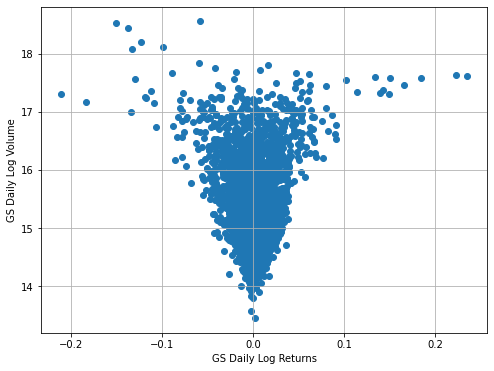

In [172]:
# Can we predict volume from returns?

plt.scatter(x=GSrtn,y=GSLogVol)
plt.ylabel('GS Daily Log Volume')
plt.xlabel('GS Daily Log Returns')
plt.grid()
plt.savefig('GS_vol_rtn')

In [173]:
# Importing stats models and sklearn modules

from statsmodels.stats.anova import anova_lm
from sklearn import linear_model
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.api as sm
from statsmodels.nonparametric.smoothers_lowess import lowess
import statsmodels.formula.api as smf

 Let's try standard linear regression
====
- Using X = GSrtn as input, without any transformation (except y)

In [174]:
#Linear model - predict log volume from return for Goldman Sachs

X1 = GSrtn
X1 = sm.add_constant(X1) # Need to add a constant to account for intercept
y = GSLogVol

# Initialise model, fit and print results, including conf. interval

model = sm.OLS(y, X1)
lm_1 = model.fit()
y_fitted= lm_1.fittedvalues
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.666
Date:                Fri, 23 Oct 2020   Prob (F-statistic):              0.103
Time:                        13:14:53   Log-Likelihood:                -3631.4
No. Observations:                3216   AIC:                             7267.
Df Residuals:                    3214   BIC:                             7279.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4009      0.013   1166.569      0.0

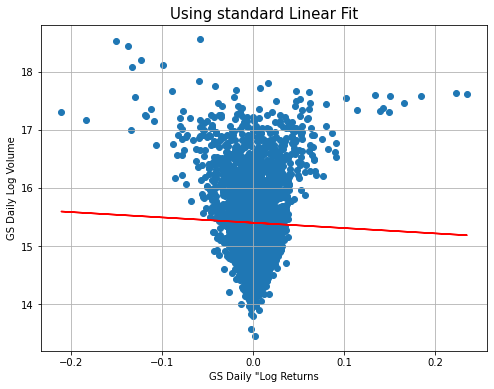

In [175]:
# Plotting again the data, but using lowess to identify a the shape of the relation 
# and showing where the linear regresssion lies

x = GSrtn
plt.plot(x,y_fitted, color = 'r')
plt.scatter(x=GSrtn,y=GSLogVol)
plt.grid()
plt.title("Using standard Linear Fit", fontsize = 15)
plt.ylabel('GS Daily Log Volume')
plt.xlabel('GS Daily "Log Returns')
plt.show()

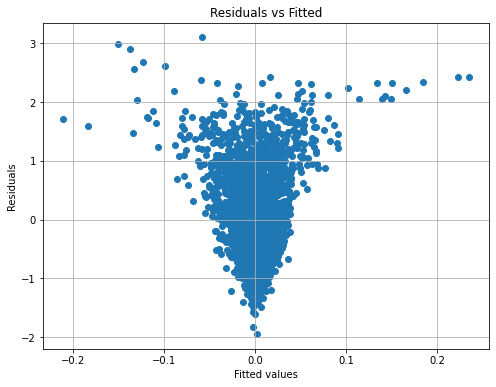

In [176]:
# 1. Check residual vs fitted values - is the model well explained by the linear relation?
res = lm_1.resid
plt.scatter(x,res)
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.grid()
plt.show()


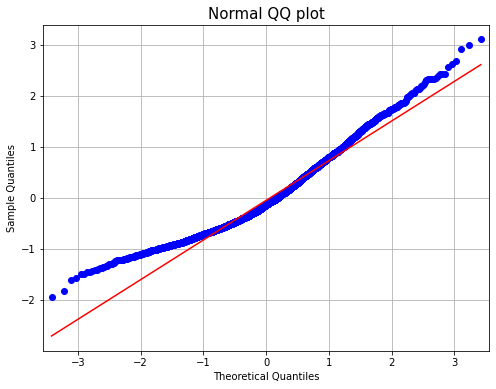

In [177]:
# 2(b). QQ plot of residuals Theoretical Quantiles normal

fig = sm.qqplot(lm_1.resid, line='q')
plt.title('Normal QQ plot', fontsize=15)
plt.grid()
plt.show()

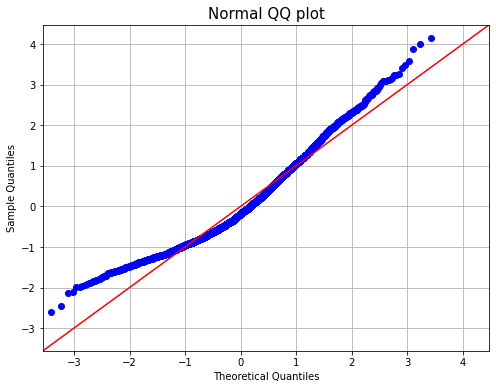

In [178]:
# 2(a). QQ plot of standardized residuals vs N(0,1) Theoretical Quantiles normal 

fig = sm.qqplot(lm_1.resid_pearson, line='45')
plt.title('Normal QQ plot', fontsize=15)
plt.grid()
plt.show()


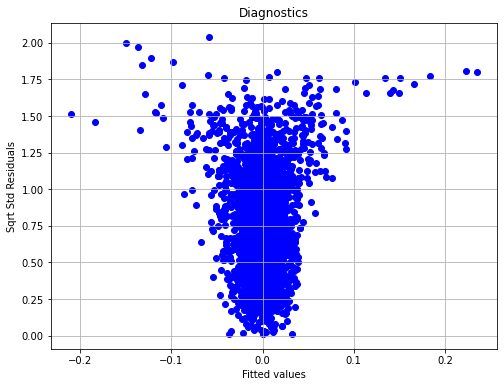

In [179]:
# 3. Check sqrt standardized residual vs fitted values - is variance constant?
# do we see homoscedasticity?

sqrt_stdRes = np.sqrt(np.abs(lm_1.resid_pearson))
plt.scatter(x,sqrt_stdRes, color = 'b')
plt.grid()
plt.title('Diagnostics')
plt.xlabel('Fitted values')
plt.ylabel('Sqrt Std Residuals')
plt.show()


Polynomial Regression 
====

In [180]:
x1 = GSrtn
x2 = np.power(x1,2)
x3 = np.power(x1,3)
x4 = np.power(x1,4)
x5 = np.power(x1,5)

df = pd.DataFrame([x1, x2, x3, x4, x5]).T
df.columns=['x1','x2','x3','x4','x5']
df.head(3)


,x1,x2,x3,x4,x5
0,-0.009360,0.000088,-8.200535e-07,7.675787e-09,-7.184618e-11
1,0.001005,0.000001,1.015871e-09,1.021218e-12,1.026592e-15
2,0.023240,0.000540,1.255106e-05,2.916805e-07,6.778510e-09


In [181]:
X = df
Xnew = sm.add_constant(X)
model = sm.OLS(y, Xnew)
lm_1 = model.fit()
y_fitted= lm_1.fittedvalues
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     199.4
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          1.67e-185
Time:                        13:14:54   Log-Likelihood:                -3197.9
No. Observations:                3216   AIC:                             6408.
Df Residuals:                    3210   BIC:                             6444.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2608      0.012   1229.698      0.0

In [182]:
X = df[['x1','x2','x3','x4']]
Xnew = sm.add_constant(X)
Xnew.head()

,const,x1,x2,x3,x4
0,1.0,-0.009360,0.000088,-8.200535e-07,7.675787e-09
1,1.0,0.001005,0.000001,1.015871e-09,1.021218e-12
2,1.0,0.023240,0.000540,1.255106e-05,2.916805e-07
3,1.0,0.001717,0.000003,5.057585e-09,8.681422e-12
4,1.0,0.019555,0.000382,7.477458e-06,1.462195e-07


In [183]:
model = sm.OLS(y, Xnew)
lm_1 = model.fit()
y_fitted= lm_1.fittedvalues
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     243.1
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          1.36e-182
Time:                        13:14:54   Log-Likelihood:                -3207.4
No. Observations:                3216   AIC:                             6425.
Df Residuals:                    3211   BIC:                             6455.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2648      0.012   1229.867      0.0

Polynomial Regression
====

- The shape of this data as represented by the lowess line on the scatter plot returns vs log volume lends itself to trying to model the regression using polynomials.

- As seen in previous examples, though, if we simply use any polynomial, we might introduce a high degree of co-linearity. Powers of x tend to be correlated, leading to unstable coefficients. 

- It seems logical: say that you are using two factors in your regression which are perfectly correlated. You will end up with a matrix which is not full rank, implying many solutions (your matrix X is full rank iff X^T X is invertible).

- It is undesirable that going from a degree 4 to a degree 5 polynomial should change the drastically the coefficients of your regression. 


In R ...
====

- In R, there is a direct solution to ensure that a linear regression using polynomial transforms of the input variable, guarantees the polynomial to be orthonmormal on the set of data. 

... and also Python
====

- In Python, there are in fact some package which offer the functionality. 
- But here we will need to define such a polyonmial from scratch. 



In [6]:
# Bespoke function returning a set of orthonormal polynomials 

def polyFit(x, degree = 1):
    n = degree + 1
    x = np.asarray(x).flatten()
    if(degree >= len(np.unique(x))):
            stop("'degree' does not correspond to number of points")
    xbar = np.mean(x)
    x = x - xbar
    X = np.fliplr(np.vander(x, n))
    q,r = np.linalg.qr(X)

    z = np.diag(np.diag(r))
    raw = np.dot(q, z)

    norm2 = np.sum(raw**2, axis=0)
    alpha = (np.sum((raw**2)*np.reshape(x,(-1,1)), axis=0)/norm2 + xbar)[:degree]
    Z = raw / np.sqrt(norm2)
    Z = np.delete(Z, 0, axis=1) #don't need constant, as will add to model
    return Z, norm2, alpha


In [7]:
# Given some set of data, return valuation at orthonormal polynomials

def polyPredict(x, alpha, norm2, degree = 1):
    x = np.asarray(x).flatten()
    n = degree + 1
    Z = np.empty((len(x), n))
    Z[:,0] = 1
    if degree > 0:
        Z[:, 1] = x - alpha[0]
    if degree > 1:
        for i in np.arange(1,degree):
            Z[:, i+1] = (x - alpha[i]) * Z[:, i] - (norm2[i] / norm2[i-1]) * Z[:, i-1]
    Z = Z/ np.sqrt(norm2)
    Z = np.delete(Z, 0, axis=1) #don't need constant, as will add to model
    return Z

In [8]:
# Understanding the functions

x = np.arange(1,101,1)

Z, norm2, alpha = polyFit(x,degree = 3);
p1 = Z[0:100,0]
p2 = Z[0:100,1]
p3 = Z[0:100,2]

In [12]:
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [187]:
# How do we check they are orthogonal? Their inner product is zero:

print(sum(p1*p2))
print(sum(p2*p3))
print(sum(p1*p3))

-1.249000902703301e-16
-1.3183898417423734e-16
-1.5959455978986625e-16


In [188]:
# And we can check that they are in fact orthonormal as 

print(sum(p1*p1))
print(sum(p2*p2))
print(sum(p3*p3))

1.0
1.0000000000000004
0.9999999999999999


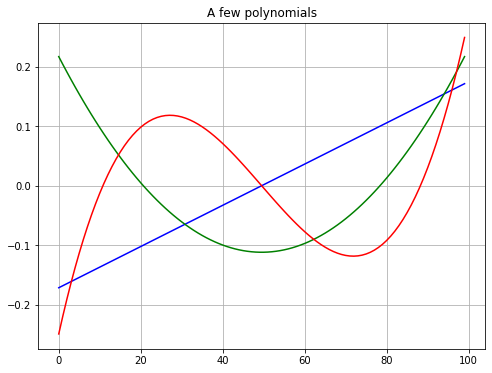

In [189]:
# Plotting the simple polynomials

plt.figure(1, figsize=(8,6))
plt.title('A few polynomials')
plt.plot(p1, 'b')
plt.plot(p2, 'g')
plt.plot(p3, 'r')
plt.grid()
plt.show()

In [190]:
xx = np.linspace(1,101,1000)
Z_pred =polyPredict(xx,alpha,norm2,3)
Z_pred[1]

array([-0.17113483,  0.21566903, -0.24607098])

Regression with polynomials up to degree 2
====

In [191]:
# Now let's use my_poly_fit to fit polyomials to our GSrtn

X1 = GSrtn
XPoly2_GSrtn, norm2_GSrtn, alpha_GSrtn = polyFit(X1,degree = 2)
y = GSLogVol


In [192]:
# I'm curious - are the polynomials generated really orthonormal?
p1 = XPoly2_GSrtn[0:5032,0]
p2 = XPoly2_GSrtn[0:5032,1]

print(sum(p1*p2))
print(sum(p1*p1))
print(sum(p2*p2))



1.4048210836802022e-16
0.999999999999998
1.0000000000000007


In [193]:
# Initialise model, fit and print results, including conf. interval

XPoly2_GSrtn = sm.add_constant(XPoly2_GSrtn)
model = sm.OLS(y, XPoly2_GSrtn)
lm_2 = model.fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     255.6
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          9.55e-104
Time:                        13:14:54   Log-Likelihood:                -3395.3
No. Observations:                3216   AIC:                             6797.
Df Residuals:                    3213   BIC:                             6815.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4009      0.012   1255.238      0.0

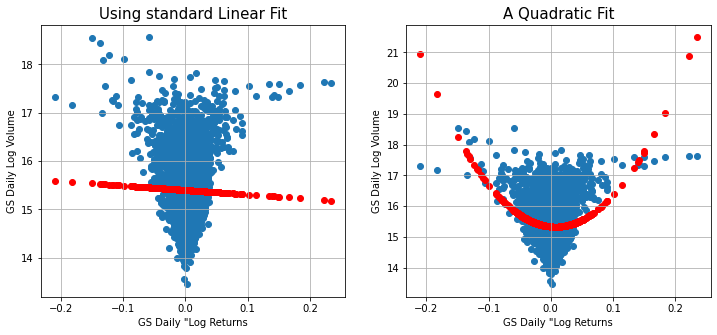

In [194]:
X1 = GSrtn
X1 = sm.add_constant(X1)
y = GSLogVol
model = sm.OLS(y, X1)
lm_1 = model.fit()
y_fitted= lm_1.fittedvalues


plt.figure(figsize=(12,5))
plt.subplot(1,2, 1)
x = GSrtn
plt.scatter(x=GSrtn,y=GSLogVol)
plt.scatter(x,y_fitted, color = 'r')
plt.grid()
plt.title("Using standard Linear Fit",fontsize = 15)
plt.ylabel('GS Daily Log Volume')
plt.xlabel('GS Daily "Log Returns')

X1 = GSrtn
XPoly2_GSrtn, norm2_GSrtn, alpha_GSrtn = polyFit(X1,degree = 2)
y = GSLogVol
XPoly2_GSrtn = sm.add_constant(XPoly2_GSrtn)

model = sm.OLS(y, XPoly2_GSrtn)
lm_2 = model.fit()
model_fitted_y = lm_2.fittedvalues

plt.subplot(1,2, 2)

plt.scatter(x=X1,y=y)
plt.grid()
plt.ylabel('GS Daily Log Volume')
plt.xlabel('GS Daily "Log Returns')
plt.title('A Quadratic Fit', fontsize = 15)
plt.scatter(X1,model_fitted_y, color = 'red')
plt.savefig("GS_compare_OLS_Quadr")


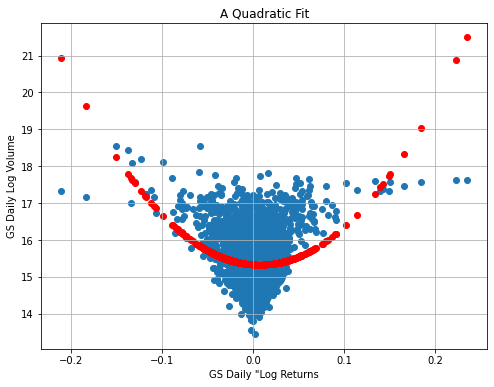

In [195]:
model_fitted_y = lm_2.fittedvalues
plt.scatter(x=X1,y=y)
plt.grid()
plt.ylabel('GS Daily Log Volume')
plt.xlabel('GS Daily "Log Returns')
plt.title('A Quadratic Fit')
plt.scatter(X1,model_fitted_y, color = 'red')
plt.show()

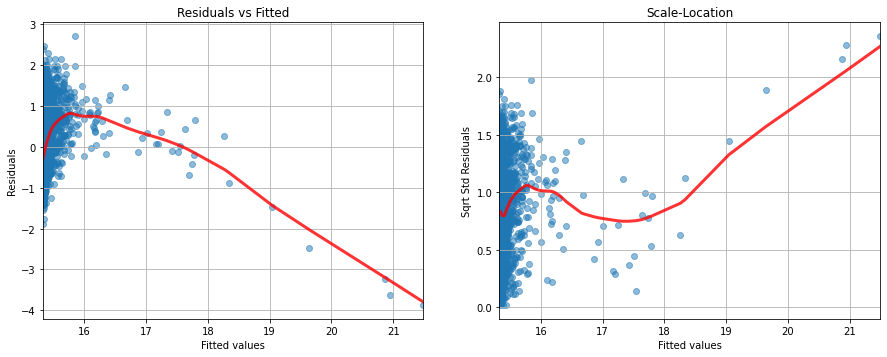

In [196]:
# Now check residuals

plt.figure(1, figsize=(15,12))
plt.subplot(2,2, 1)
plt.grid()
plt_result = sns.regplot(model_fitted_y, lm_2.resid, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8})
plt_result.set_title('Residuals vs Fitted')
plt_result.set_xlabel('Fitted values')
plt_result.set_ylabel('Residuals')


plt.subplot(2,2, 2) # 2 by 2 and plot 2
plt.figure(1, figsize=(15,12))
sqrt_stdRes = np.sqrt(np.abs(lm_2.resid_pearson))
plt.grid()
plt_result = sns.regplot(model_fitted_y, sqrt_stdRes, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8})
plt_result.set_title('Scale-Location')
plt_result.set_xlabel('Fitted values')
plt_result.set_ylabel('Sqrt Std Residuals')

plt.show()


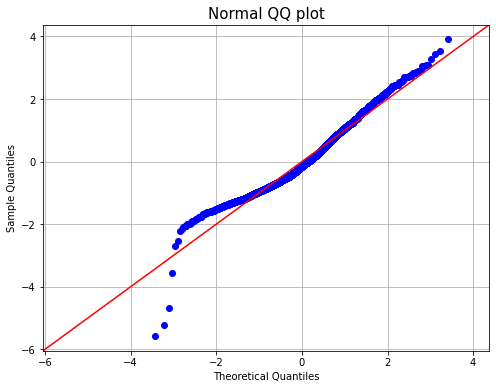

In [197]:
# Check residuals: QQ plot

fig = sm.qqplot(lm_2.resid_pearson, line='45')
plt.title('Normal QQ plot', fontsize=15)
plt.grid()
plt.show()

Regression with polynomials up to degree 10
====

In [198]:
# Using my_poly_fit, fit polyomials of up to degree 10!

X1 = GSrtn
XPoly10_GSrtn, norm2_GSrtn_10, alpha_GSrtn_10 = polyFit(X1,degree = 10)
y = GSLogVol

In [199]:
# Are the polynomials generated still orthonormal - many combinations to check, let me just see a few...

p7 = XPoly10_GSrtn[0:5032,7]
p5 = XPoly10_GSrtn[0:5032,5]

print(sum(p5*p7))
print(sum(p5*p5))
print(sum(p7*p7))

2.304962996727347e-16
0.9999999999999982
1.000000000000004


In [200]:
# Initialise model, fit and print results

XPoly10_GSrtn = sm.add_constant(XPoly10_GSrtn)
model = sm.OLS(y, XPoly10_GSrtn)
lm_10 = model.fit()
print(lm_10.summary())


                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     149.2
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          2.78e-257
Time:                        13:14:57   Log-Likelihood:                -3018.2
No. Observations:                3216   AIC:                             6058.
Df Residuals:                    3205   BIC:                             6125.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4009      0.011   1409.675      0.0

In [201]:
# Using the model to predict given new data:

newX1 = np.linspace(X1.min(), X1.max(), 300)
predict_XPoly10 = polyPredict(newX1, alpha_GSrtn_10, norm2_GSrtn_10, degree = 10) 
ones = np.ones(len(newX1),dtype=np.int16)
predict_XPoly10 = np.insert(predict_XPoly10, 0, ones, axis = 1)
y_predict_10 = lm_10.predict(predict_XPoly10)

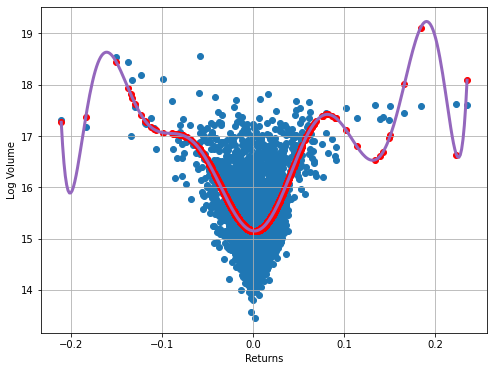

In [202]:
# Check predicted values of new points to see the curve 

plt.scatter(x=X1,y=y)
plt.plot(newX1, y_predict_10, 'C4', lw=3)
plt.scatter(X1,lm_10.fittedvalues, color = 'red')
plt.ylabel('Log Volume')
plt.xlabel('Returns')
plt.grid()
plt.show()


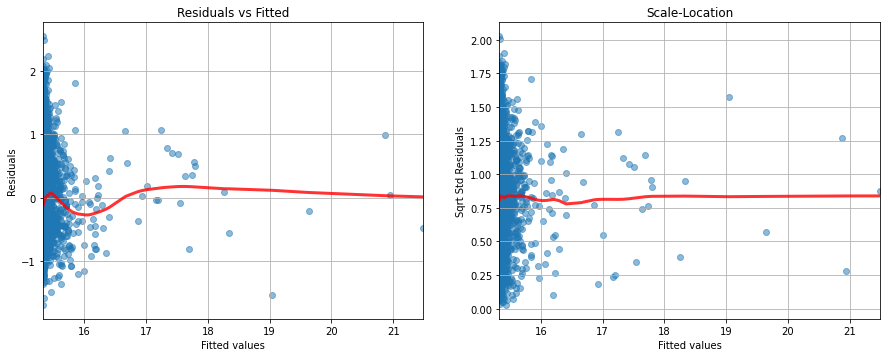

In [203]:
# Now check residuals

plt.figure(1, figsize=(15,12))
plt.subplot(2,2, 1)
plt.grid()
plt_result = sns.regplot(model_fitted_y, lm_10.resid, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8})
plt_result.set_title('Residuals vs Fitted')
plt_result.set_xlabel('Fitted values')
plt_result.set_ylabel('Residuals')


plt.subplot(2,2, 2) # 2 by 2 and plot 2
plt.figure(1, figsize=(15,12))
sqrt_stdRes = np.sqrt(np.abs(lm_10.resid_pearson))
plt.grid()
plt_result = sns.regplot(model_fitted_y, sqrt_stdRes, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8})
plt_result.set_title('Scale-Location')
plt_result.set_xlabel('Fitted values')
plt_result.set_ylabel('Sqrt Std Residuals')

plt.show()

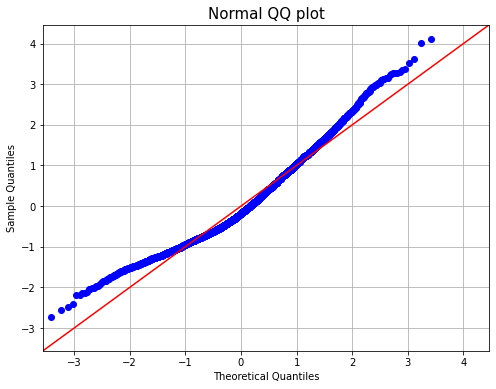

In [204]:
# Check residuals: QQ plot

fig = sm.qqplot(lm_10.resid_pearson, line='45')
plt.title('Normal QQ plot', fontsize=15)
plt.grid()
plt.show()

Regression with polynomials up to degree 20!
====

In [205]:
# Using my_poly_fit, fit polyomials of up to degree 10!

X1 = GSrtn
XPoly20_GSrtn, norm2_GSrtn_20, alpha_GSrtn_20 = polyFit(X1,degree = 20)
y = GSLogVol

# Initialise model, fit and print results

XPoly20_GSrtn = sm.add_constant(XPoly20_GSrtn)
model = sm.OLS(y, XPoly20_GSrtn)
lm_20 = model.fit()
y_fitted_20 = lm_20.fittedvalues
print(lm_20.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     79.38
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          1.29e-261
Time:                        13:14:59   Log-Likelihood:                -2984.1
No. Observations:                3216   AIC:                             6010.
Df Residuals:                    3195   BIC:                             6138.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.4009      0.011   1422.454      0.0

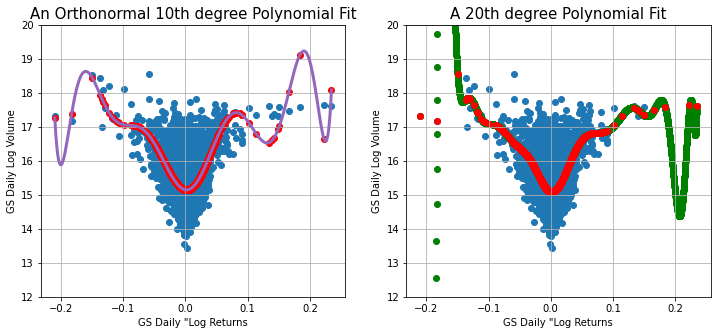

In [206]:
plt.figure(figsize=(12,5))
plt.subplot(1,2, 1)
newX1 = np.linspace(X1.min(), X1.max(), 300)
predict_XPoly10 = polyPredict(newX1, alpha_GSrtn_10, norm2_GSrtn_10, degree = 10) 
ones = np.ones(len(newX1),dtype=np.int16)
predict_XPoly10 = np.insert(predict_XPoly10, 0, ones, axis = 1)
y_predict_10 = lm_10.predict(predict_XPoly10)

plt.scatter(x=X1,y=y)
plt.plot(newX1, y_predict_10, 'C4', lw=3)
plt.scatter(X1,lm_10.fittedvalues, color = 'red')
plt.ylabel('GS Daily Log Volume')
plt.xlabel('GS Daily "Log Returns')
plt.title('An Orthonormal 10th degree Polynomial Fit', fontsize = 15)
plt.ylim((12,20))
plt.grid()


plt.subplot(1,2, 2)
newX1 = np.linspace(X1.min(), X1.max(), 3612)
predict_XPoly20= polyPredict(newX1, alpha_GSrtn_20, norm2_GSrtn_20, degree = 20) 
ones = np.ones(len(newX1),dtype=np.float)
predict_XPoly20 = np.insert(predict_XPoly20, 0, ones, axis = 1)
y_predict_20 = lm_20.predict(predict_XPoly20)

plt.scatter(x=X1,y=y)
plt.scatter(x= newX1,y= y_predict_20, color = 'g')
plt.scatter(X1,y_fitted_20, color = 'red')
plt.ylabel('GS Daily Log Volume')
plt.xlabel('GS Daily "Log Returns')
plt.title('A 20th degree Polynomial Fit', fontsize = 15)
plt.ylim((12,20))
plt.grid()
plt.savefig("GS_10_20")


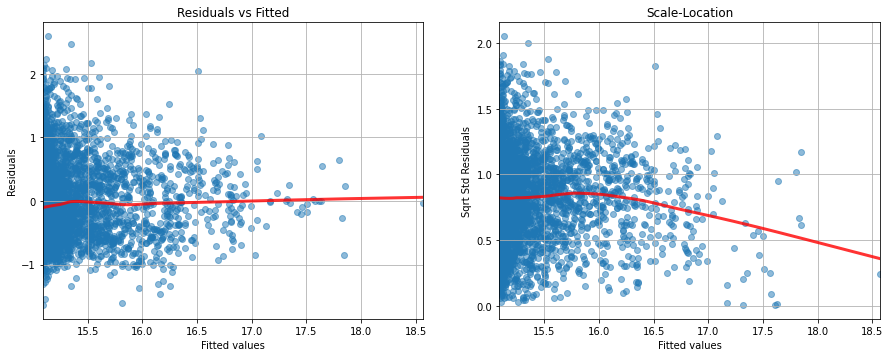

In [207]:
# Now check residuals

plt.figure(1, figsize=(15,12))
plt.subplot(2,2, 1)
plt.grid()
plt_result = sns.regplot(y_fitted_20, lm_20.resid, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8})
plt_result.set_title('Residuals vs Fitted')
plt_result.set_xlabel('Fitted values')
plt_result.set_ylabel('Residuals')


plt.subplot(2,2, 2) # 2 by 2 and plot 2
plt.figure(1, figsize=(15,12))
sqrt_stdRes = np.sqrt(np.abs(lm_20.resid_pearson))
plt.grid()
plt_result = sns.regplot(y_fitted_20, sqrt_stdRes, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8})
plt_result.set_title('Scale-Location')
plt_result.set_xlabel('Fitted values')
plt_result.set_ylabel('Sqrt Std Residuals')

plt.show()

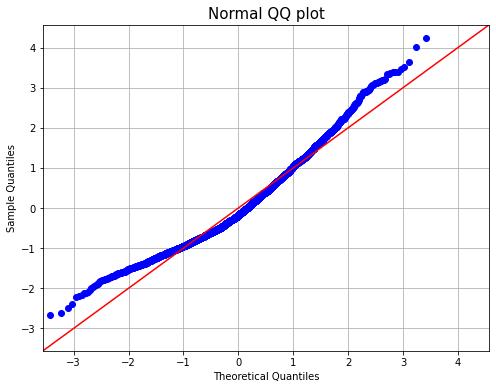

In [208]:
# Check residuals: QQ plot

fig = sm.qqplot(lm_20.resid_pearson, line='45')
plt.title('Normal QQ plot', fontsize=15)
plt.grid()
plt.show()


Regression Fitting a Piecewise Linear Model
====

In [209]:
# Define a piecewise linear function given data and knots

def pielinear(x, knots):
    n = len(knots) 
    res = x 
    nullArray = np.zeros(len(x))
    for i in np.arange(0,n):
        res = np.vstack((res,np.maximum(x-knots[i],nullArray)))
    return res

In [210]:
# Test my function:

x = np.asarray([1,2,3,4,5,6,7,8])
knots = np.asarray([1.2,1.8])
pielinear(x,knots).T

array([[1. , 0. , 0. ],
       [2. , 0.8, 0.2],
       [3. , 1.8, 1.2],
       [4. , 2.8, 2.2],
       [5. , 3.8, 3.2],
       [6. , 4.8, 4.2],
       [7. , 5.8, 5.2],
       [8. , 6.8, 6.2]])

In [211]:
# Choose knots to be quantiles - notice, there are a large number of choices for these points...

x = GSrtn.values
df = 6 # degrees of freedom
n = df - 1 
percentiles = np.asarray([1/n*100,2/n*100,3/n*100,4/n*100])
knots_6 = np.percentile(x, percentiles)
X_piece = pielinear(x,knots_6)
x1 = X_piece[0].T
x2 = X_piece[1].T
x3 = X_piece[2].T
x4 = X_piece[3].T
x5 = X_piece[4].T
print(knots_6)

[-0.01254122 -0.00330307  0.00376747  0.01319558]


In [212]:
# Create a dataframe with all relevant data

y = GSLogVol
df = pd.DataFrame([y,x1, x2, x3, x4, x5]).T#Transpose
df.columns=['y','x1','x2','x3','x4','x5']
df.head()

,y,x1,x2,x3,x4,x5
0,15.681171,-0.009360,0.003181,0.000000,0.000000,0.000000
1,15.589259,0.001005,0.013546,0.004308,0.000000,0.000000
2,15.876151,0.023240,0.035781,0.026543,0.019472,0.010044
3,15.782217,0.001717,0.014258,0.005020,0.000000,0.000000
4,15.898159,0.019555,0.032096,0.022858,0.015787,0.006359


In [213]:
# Piecewise linear regression

model = smf.ols(formula = 'y ~ x1 + x2 + x3 + x4 + x5', data = df)
lm_pwl = model.fit()
lm_pwl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     286.0
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          1.29e-253
Time:                        13:15:01   Log-Likelihood:                -3040.3
No. Observations:                3216   AIC:                             6093.
Df Residuals:                    3210   BIC:                             6129.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2065      0.036    426.841      0.000      15.137      15.276
x1           -20.3260      1.083    -18.767      0.000     -22.450     -18.202
x2           -24.1807      5.382     -4.492      0.000     -34.734     -13.627
x3            41.5475     10.648      3.902      0.000      20.669      62.426
x4            44.9603     10.383      4.330      0.000      24.602      65.319
x5           -22.4471      5.078     -4.421      0.000     -32.403     -12.491
==============================================================================
Omnibus:                      209.261   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.328
Skew:                           0.662   Prob(JB):                     4.39e-55
Kurtosis:                       3.338   Cond. No.                     1.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

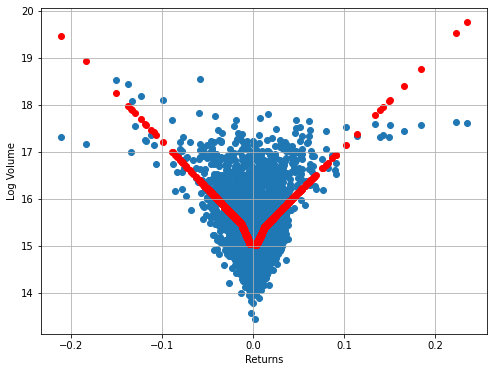

In [214]:
y_fitted_pwl = lm_pwl.fittedvalues
x = GSrtn
plt.scatter(x=GSrtn,y=GSLogVol)
plt.scatter(x,y_fitted_pwl, color = 'red')
plt.ylabel('Log Volume')
plt.xlabel('Returns')
plt.grid()
plt.show()

- Can we try without the formula?

In [215]:
# Initialise model, fit and print results

X_piece_T = X_piece.T
model = sm.OLS(y, X_piece_T)
lm_piecewise = model.fit()
print(lm_piecewise.summary());


                                 OLS Regression Results                                
Dep. Variable:                      x   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              6173.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                        0.00
Time:                        13:15:02   Log-Likelihood:                         -9562.8
No. Observations:                3216   AIC:                                  1.914e+04
Df Residuals:                    3211   BIC:                                  1.917e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Wait!
====

- Did something go wrong? 

- Why are the coefficients no longer the same?

In [216]:
# Initialise model, fit and print results

X_piece_T = X_piece.T
X_piece_T = sm.add_constant(X_piece_T)
model = sm.OLS(y, X_piece_T)
lm_piecewise_6 = model.fit()
y_fitted_piecewise_6 = lm_piecewise_6.fittedvalues
print(lm_piecewise_6.summary())
X_piece_T.shape


                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     286.0
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          1.29e-253
Time:                        13:15:02   Log-Likelihood:                -3040.3
No. Observations:                3216   AIC:                             6093.
Df Residuals:                    3210   BIC:                             6129.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.2065      0.036    426.841      0.0

(3216, 6)

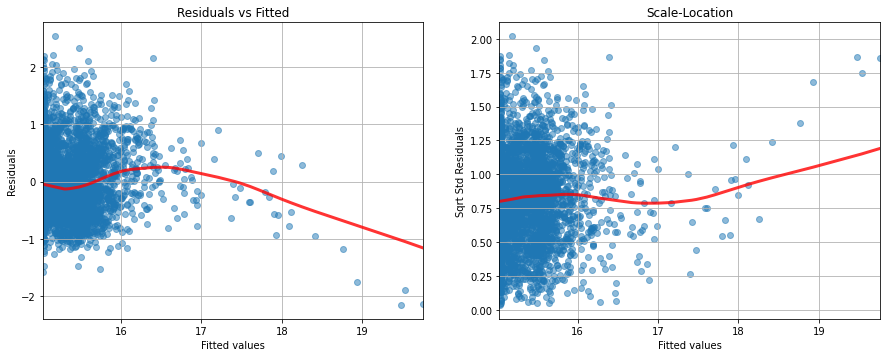

In [217]:
# Now check residuals

plt.figure(1, figsize=(15,12))
plt.subplot(2,2, 1)
plt.grid()
plt_result = sns.regplot(y_fitted_piecewise_6, lm_piecewise_6.resid, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8})
plt_result.set_title('Residuals vs Fitted')
plt_result.set_xlabel('Fitted values')
plt_result.set_ylabel('Residuals')


plt.subplot(2,2, 2) # 2 by 2 and plot 2
plt.figure(1, figsize=(15,12))
sqrt_stdRes = np.sqrt(np.abs(lm_piecewise_6.resid_pearson))
plt.grid()
plt_result = sns.regplot(y_fitted_piecewise_6, sqrt_stdRes, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8})
plt_result.set_title('Scale-Location')
plt_result.set_xlabel('Fitted values')
plt_result.set_ylabel('Sqrt Std Residuals')

plt.show()

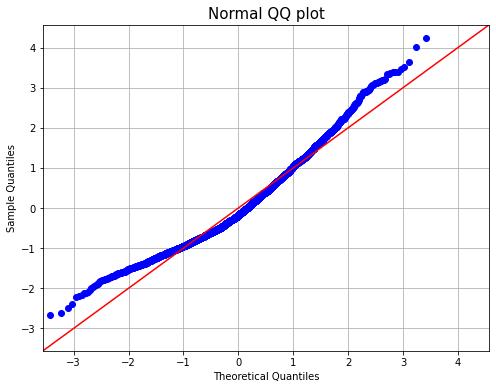

In [218]:
# Check residuals: QQ plot

fig = sm.qqplot(lm_20.resid_pearson, line='45')
plt.title('Normal QQ plot', fontsize=15)
plt.grid()
plt.show()

Plotting prediction intervals
====

In [219]:
# Predict given new X's

newX1 = np.linspace(X1.min(), X1.max(), 3612)
X_piece_new = pielinear(newX1,knots_6)
X_piece_new_T = X_piece_new.T
ones = np.ones(len(newX1),dtype=np.float)
X_piece_new_T = np.insert(X_piece_new_T, 0, ones, axis = 1)

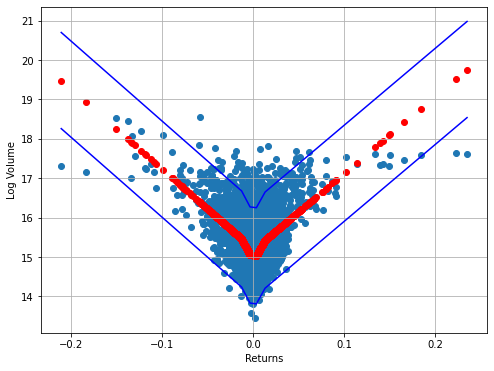

In [220]:
#Prediction interval

model_pred_y = lm_piecewise_6.predict(X_piece_new_T)
res = lm_piecewise_6.resid
model_pred_y_up = model_pred_y + 1.96*np.std(res)
model_pred_y_down = model_pred_y - 1.96*np.std(res)
model_fitted_y = lm_piecewise.fittedvalues

plt.scatter(x=GSrtn,y=GSLogVol)
plt.scatter(x=GSrtn, y=y_fitted_piecewise_6, color = 'red')
plt.plot(newX1,model_pred_y_up, color = 'blue')
plt.plot(newX1,model_pred_y_down, color = 'blue')
plt.ylabel('Log Volume')
plt.xlabel('Returns')
plt.grid()

plt.show()


Using an Approx F-Test for two Piecewise Linear Regressions
====

In [221]:
# Create another piecewise linear models with different degrees of freedom
# and apply the Approx. F-Test

x = GSrtn
df = 8 # degrees of freedom
n = df - 1 
percentiles = np.asarray([1/n*100,2/n*100,3/n*100,4/n*100,5/n*100,6/n*100])
knots = np.percentile(x, percentiles)
X_piece_8 = pielinear(x,knots)
X_piece_8 = X_piece_8.T
X_piece_8 = sm.add_constant(X_piece_8)
model = sm.OLS(y, X_piece_8)
lm_piecewise_8 = model.fit()
print(lm_piecewise_8.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     209.9
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          3.61e-257
Time:                        13:15:04   Log-Likelihood:                -3026.4
No. Observations:                3216   AIC:                             6069.
Df Residuals:                    3208   BIC:                             6117.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.3044      0.046    329.690      0.0

In [222]:
table1 = anova_lm(lm_piecewise_6,lm_piecewise_8)
print(table1)

   df_resid          ssr  df_diff    ss_diff          F        Pr(>F)
0    3210.0  1247.341832      0.0        NaN        NaN           NaN
1    3208.0  1236.591685      2.0  10.750146  13.944162  9.338967e-07


Regression using splines
====

In [223]:
percentiles = np.asarray([10,20,40,50,60,70,80,90])
knots = np.percentile(x, percentiles)
print(knots)

[-0.02217097 -0.01254122 -0.00330307  0.00028287  0.00376747  0.00770073
  0.01319558  0.02194713]


In [224]:
# Define a cubic basis function given data and knots

def cubic(x, knots):
    n = len(knots) 
    res = x
    res = np.vstack((res,x**2))
    res = np.vstack((res,x**3))
    nullArray = np.zeros(len(x))
    for i in np.arange(0,n):
        res = np.vstack((res,np.maximum(x-knots[i],nullArray)**3))
    return res

In [225]:
test = cubic(x,knots).T
test.shape

(3216, 11)

In [226]:
x = GSrtn
X_cubic = cubic(x,knots).T
X_cubic.shape

(3216, 11)

In [227]:
X_cubic = sm.add_constant(X_cubic)
model = sm.OLS(y, X_cubic)
lm_cubic = model.fit()
print(lm_cubic.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     145.4
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          7.08e-272
Time:                        13:15:04   Log-Likelihood:                -2981.7
No. Observations:                3216   AIC:                             5987.
Df Residuals:                    3204   BIC:                             6060.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0600      0.108    139.854      0.0

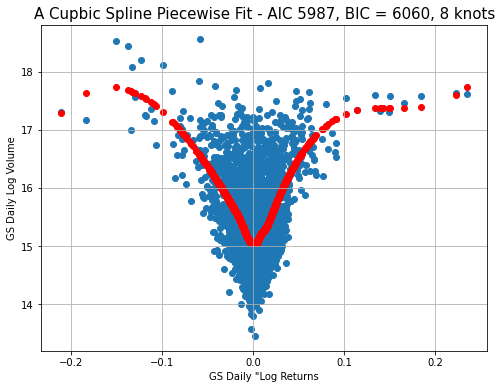

In [228]:
y_fitted_cubic = lm_cubic.fittedvalues
x = GSrtn
plt.grid()
plt.scatter(x=GSrtn,y=GSLogVol)
plt.ylabel('GS Daily Log Volume')
plt.xlabel('GS Daily "Log Returns')
plt.title('A Cupbic Spline Piecewise Fit - AIC 5987, BIC = 6060, 8 knots', fontsize = 15)
plt.scatter(x,y_fitted_cubic, color = 'red')
plt.savefig("GS_Cubic_spline")

An example with B-Splines
====

In [4]:
# Finding the bSpline matrix in Python equivalent to R
import patsy
from patsy import dmatrix

In [230]:
x = GSrtn
y = GSLogVol
data = {"x": x}
x_matrix = dmatrix("bs(x, df=7)", data)
x_transformed = np.asarray(x_matrix)
x_transformed = np.delete(x_transformed, 0, axis=1) #remove intercept

x_transformed = sm.add_constant(x_transformed)
model = sm.OLS(y, x_transformed)
lm_bspline = model.fit()
print(lm_bspline.summary())


                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     227.3
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          5.29e-275
Time:                        13:15:04   Log-Likelihood:                -2985.1
No. Observations:                3216   AIC:                             5986.
Df Residuals:                    3208   BIC:                             6035.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4033      0.528     32.990      0.0

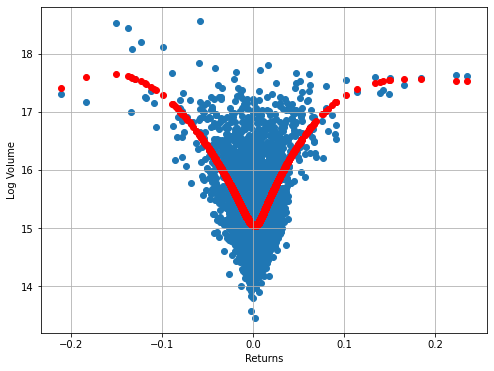

In [231]:
y_fitted_bSpline = lm_bspline.fittedvalues
x = GSrtn
plt.grid()
plt.scatter(x=x,y=GSLogVol)
plt.ylabel('Log Volume')
plt.xlabel('Returns')
plt.scatter(x,y_fitted_bSpline, color = 'red')
plt.show()

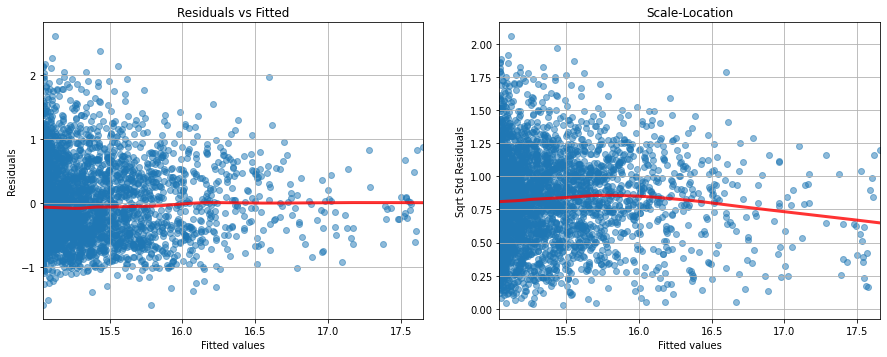

In [232]:
# Now check residuals

plt.figure(1, figsize=(15,12))
plt.subplot(2,2, 1)
plt.grid()
plt_result = sns.regplot(y_fitted_bSpline, lm_bspline.resid, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8})
plt_result.set_title('Residuals vs Fitted')
plt_result.set_xlabel('Fitted values')
plt_result.set_ylabel('Residuals')


plt.subplot(2,2, 2) # 2 by 2 and plot 2
plt.figure(1, figsize=(15,12))
sqrt_stdRes = np.sqrt(np.abs(lm_bspline.resid_pearson))
plt.grid()
plt_result = sns.regplot(y_fitted_bSpline, sqrt_stdRes, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 3, 'alpha': 0.8})
plt_result.set_title('Scale-Location')
plt_result.set_xlabel('Fitted values')
plt_result.set_ylabel('Sqrt Std Residuals')

plt.show()

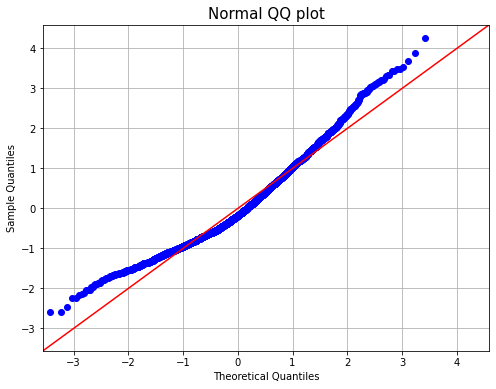

In [233]:
# Check residuals: QQ plot

fig = sm.qqplot(lm_bspline.resid_pearson, line='45')
plt.title('Normal QQ plot', fontsize=15)
plt.grid()
plt.show()

An example with Natural-Cubic-Splines
====

[-0.2102226  -0.01249742 -0.00328225  0.00377439  0.01315922  0.2348177 ]
(100, 5)


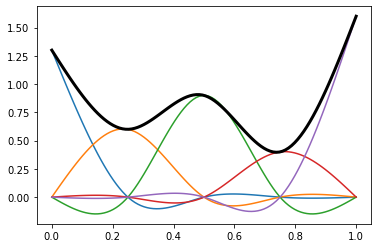

In [5]:
x = np.linspace(0., 1., 100)
knots =np.array([-0.2102226,-0.012497421, -0.003282246, 0.003774393, 0.013159222, 0.2348177])
print(knots)
y = dmatrix("cr(x, df=5,knots=[0.25,0.5,0.75],)-1", {"x": x})#constraints='center'
b = np.array([1.3, 0.6, 0.9, 0.4, 1.6])
y=np.asarray(y)
ns_p = pd.DataFrame(y) 
print(y.shape)
plt.plot(x, y*b);
plt.plot(x, np.dot(y, b), color='k', linewidth=3);

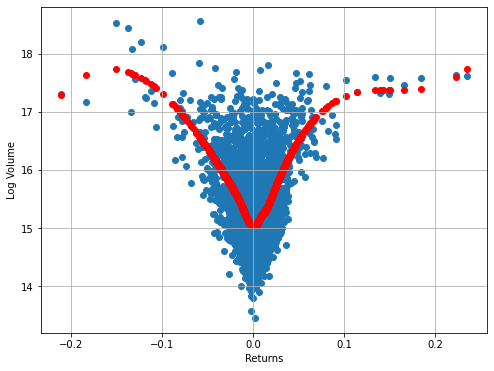

In [235]:
y_fitted_cubic = lm_cubic.fittedvalues
x = GSrtn
plt.grid()
plt.scatter(x=x,y=GSLogVol)
plt.ylabel('Log Volume')
plt.xlabel('Returns')
plt.scatter(x,y_fitted_cubic, color = 'red')
plt.show()

In [262]:
# Data
x = GSrtn
y = GSLogVol

# Use Natural Spline Regression
data = {"x": x}
x_ns_5 = dmatrix("cr(x, df=5)-1", data)
x_ns_5 = np.asarray(x_ns_5)
x_ns_5 = sm.add_constant(x_ns_5)

model = sm.OLS(y, x_ns_5)
lm_spline = model.fit()
print(lm_spline.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     395.7
Date:                Fri, 23 Oct 2020   Prob (F-statistic):          2.07e-277
Time:                        13:16:49   Log-Likelihood:                -2988.4
No. Observations:                3216   AIC:                             5987.
Df Residuals:                    3211   BIC:                             6017.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4712      0.080    168.447      0.0

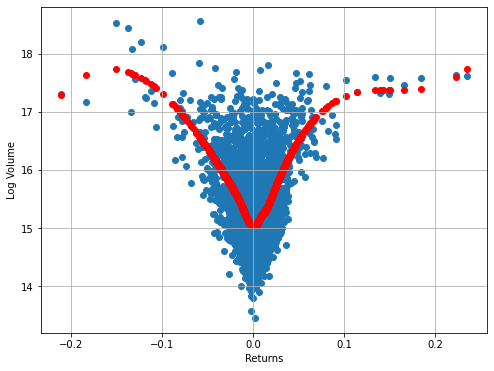

In [263]:
y_fitted_spline = lm_spline.fittedvalues
x = GSrtn
plt.grid()
plt.scatter(x=x,y=GSLogVol)
plt.ylabel('Log Volume')
plt.xlabel('Returns')
plt.scatter(x,y_fitted_cubic, color = 'red')
plt.show()

In [237]:
df = pd.read_csv('strips_dec95.csv')
df.head()

,T,price
0,0.1260,99.393
1,0.6219,96.924
2,1.1260,94.511
3,1.6219,92.070
4,2.1260,89.644


In [238]:
df.shape

(117, 2)

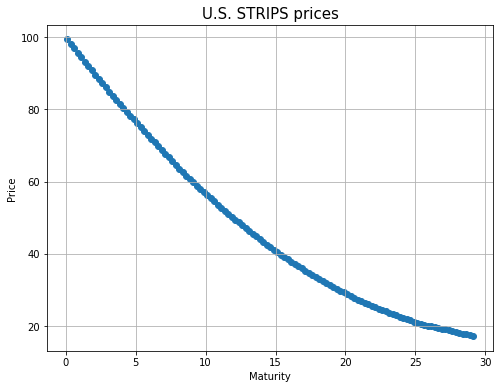

In [239]:
plt.scatter(df['T'],df['price'])
plt.ylabel('Price')
plt.xlabel('Maturity')
plt.title('U.S. STRIPS prices', fontsize = 15)
plt.grid()
plt.savefig("US_STRIPS_PRICES")

In [240]:

def getEmpiricalFwrdRate(mat,price):
    n = len(mat)
    temp = np.zeros(n-1)
    for i in range(0,n-1):
        dt = mat[i+1]-mat[i]
        temp[i] = - np.log(price[i+1]/price[i])/dt  
    len(temp)
    return temp



In [241]:
rt = getEmpiricalFwrdRate(df['T'],df['price'])
mat = df['T'].iloc[1:]

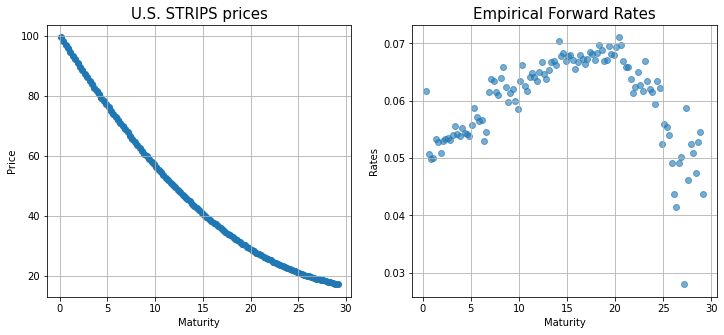

In [242]:
plt.figure(figsize=(12,5))
plt.subplot(1,2, 1)
plt.scatter(df['T'],df['price'])
plt.ylabel('Price')
plt.xlabel('Maturity')
plt.title('U.S. STRIPS prices', fontsize = 15)
plt.grid()
plt.subplot(1,2,2)
plt.scatter(mat,rt, alpha = 0.6)
plt.ylabel('Rates')
plt.xlabel('Maturity')
plt.title('Empirical Forward Rates', fontsize = 15)
plt.grid()
plt.savefig("US_STRIPS_PRICE_FWRDRATE")

In [243]:
len(rt)

116

In [244]:
import scipy.optimize
from scipy.optimize import least_squares

In [245]:
#  Simple Quadratic in rt

def minFunc_quadratic(beta, T, yPrice):
    bondPrice = 100*np.exp(-beta[0]*T - beta[1] *T*T/2 - beta[2]*T*T*T/3)
    return (bondPrice - yPrice)

t_train = np.asarray(df['T'].values)
y_train = np.asarray(df['price'].values)            
x0_q = np.array([0.047492264,0.002403235,-0.000075424])
minFunc_quadratic(x0_q, 0.2, 30)


69.04991050580975

In [246]:
#  Simple Cubic in rt

def minFunc_cubic(beta, T, yPrice):
    bondPrice = 100*np.exp(-beta[0]*T - beta[1] *T*T/2 - beta[2]*T*T*T/3- beta[3]*T*T*T*T/4)
    return (bondPrice - yPrice)

t_train = np.asarray(df['T'].values)
y_train = np.asarray(df['price'].values)            
x0_c = np.array([0.005044677,0.0009005467,0.00008260526,-0.000004327208])
minFunc_cubic(x0_c, 0.2, 30)

69.89733624694641

In [247]:
res_quad = least_squares(minFunc_quadratic,x0_q, args = (t_train,y_train))
res_c = least_squares(minFunc_cubic,x0_c, args = (t_train,y_train))

In [248]:
res_quad.x

array([ 4.7492264e-02,  2.4032350e-03, -7.5424000e-05])

In [249]:
res_c.x

array([ 5.04477055e-02,  9.00073454e-04,  8.26549455e-05, -4.32856657e-06])

In [250]:
def genData_quadratic(mat, beta):
    n = len(mat)
    bondPrice = np.zeros(n)
    for i in range(n):
        T = mat[i]
        bondPrice[i] = 100*np.exp(-beta[0]*T - beta[1] *T*T/2 - beta[2]*T*T*T/3 )
    return bondPrice

In [251]:
def genData_cubic(mat, beta):
    n = len(mat)
    bondPrice = np.zeros(n)
    for i in range(n):
        T = mat[i]
        bondPrice[i] = 100*np.exp(-beta[0]*T - beta[1] *T*T/2 - beta[2]*T*T*T/3 - beta[3]*T*T*T*T/4 )
    return bondPrice

In [252]:
t_min = df['T'].min()
t_max = df['T'].max()
n_points = len(df)

t_test = np.linspace(t_min, t_max, n_points * 10)
y_true = y_train
y_lsq_q = genData_quadratic(t_test, res_quad.x)
y_lsq_c = genData_cubic(t_test, res_c.x)



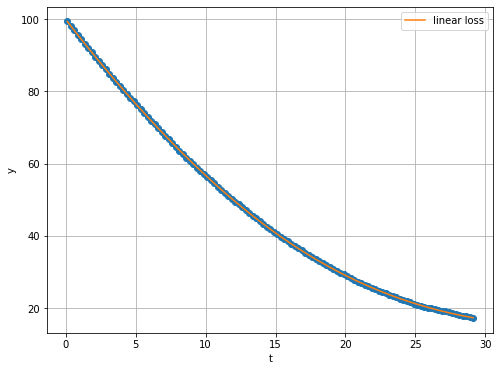

In [253]:
plt.plot(t_train, y_train, 'o')
plt.plot(t_test, y_lsq_c, label='linear loss')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

In [254]:
rt_sq_q = getEmpiricalFwrdRate(t_test,y_lsq_q)
rt_sq_c = getEmpiricalFwrdRate(t_test,y_lsq_c)
m = len(rt_sq_q)
t_test_1 = np.zeros(m)
for i in range(m):
    t_test_1[i] = t_test[i+1] 

In [255]:
def get_quadratic(x,beta):
    n = len(x)
    r = np.zeros(n)
    for i in range(n):
        r[i] = beta[0]+beta[1]*x[i]+beta[2]*x[i]*x[i]
    return r

In [256]:
def get_cubic(x,beta):
    n = len(x)
    r = np.zeros(n)
    for i in range(n):
        r[i] = beta[0]+beta[1]*x[i]+beta[2]*x[i]*x[i] + beta[3]*x[i]*x[i]*x[i]
    return r

In [257]:
rt_sq_q = get_quadratic(t_test,res_quad.x)
rt_sq_c = get_cubic(t_test,res_c.x)

t_test_1 = t_test


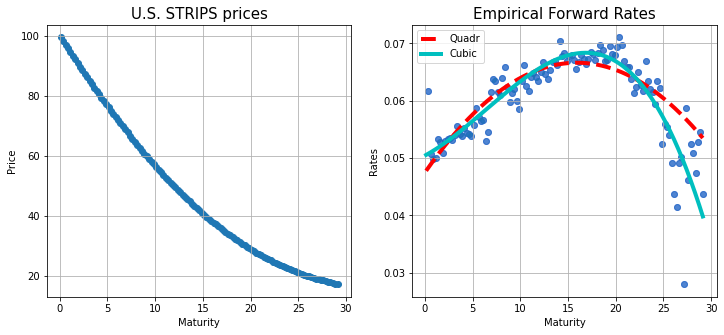

In [258]:
plt.figure(figsize=(12,5))
plt.subplot(1,2, 1)
plt.scatter(df['T'],df['price'])
plt.ylabel('Price')
plt.xlabel('Maturity')
plt.title('U.S. STRIPS prices', fontsize = 15)
plt.grid()

plt.subplot(1,2,2)
plt.scatter(mat,rt, alpha = 0.4, color = 'b')
plt.plot(t_test_1,rt_sq_q, linewidth = 4, linestyle = 'dashed', color = 'r', label ='Quadr')
plt.scatter(mat,rt, alpha = 0.6)
plt.plot(t_test_1,rt_sq_c, linewidth = 4, color = 'c',label ='Cubic')
plt.ylabel('Rates')
plt.xlabel('Maturity')
plt.title('Empirical Forward Rates', fontsize = 15)
plt.grid()
plt.legend(loc='best');
plt.savefig("USStrips_graph1")

In [259]:
percentiles = np.asarray([50])
knot = np.percentile(mat, percentiles)

In [260]:
knot

array([14.74795])